Importamos las bibliotecas necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI

Creación de una instancia de CoinGeckoAPI para acceder a la API CoinGecko

In [2]:
cg = CoinGeckoAPI()

Comprobación de conexión con la API CoinGecko

In [3]:
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

 Obtención de las categorías de las monedas desde la API CoinGecko

In [4]:
coin_categories = pd.DataFrame(cg.get_coins_categories_list())

Mostramos las primeras filas del DataFrame coin_categories

In [5]:
coin_categories.head()

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,alleged-sec-securities,Alleged SEC Securities
3,analytics,Analytics
4,animal-racing,Animal Racing


Filtramos las categorías de monedas que contienen la palabra 'stable'

In [6]:
coin_categories[coin_categories['category_id'].str.contains('stable')]

,category_id,name
35,cny-stablecoin,CNY Stablecoin
64,eur-stablecoin,EUR Stablecoin
75,gbp-stablecoin,GBP Stablecoin
85,idr-stablecoin,IDR Stablecoin
97,jpy-stablecoin,JPY Stablecoin
101,krw-stablecoin,KRW Stablecoin
172,stablecoins,Stablecoins
190,try-stablecoins,TRY Stablecoin
191,usd-stablecoin,USD Stablecoin


Verificamos

Dentro del vasto universo de las 'Stable Coins' encontramos varias categorías.

Nos centraremos en los datos del mercado de las stablecoins en relación al dólar estadounidense (USD).

Ordenaremos estos datos en un DataFrame llamado stable_market_cap_data en orden descendente según la columna 'market_cap' (capitalización de mercado).

In [7]:
stable_market_cap_data = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'stablecoins')).sort_values('market_cap', ascending=False)

Comenzamos a organizar nuestros datos

Buscamos el detalle de las primeras 10 stablecoins en función de su capitalización de mercado, incluyendo su nombre, precio actual, capitalización de mercado y suministro circulante.

In [8]:
stable_df = stable_market_cap_data[['name', 'current_price', 'market_cap', 'circulating_supply']].head(10)

Verificamos

In [9]:
display(stable_df)

,name,current_price,market_cap,circulating_supply
0,Tether,0.998615,8.311340e+10,8.318200e+10
1,USD Coin,1.000000,2.603458e+10,2.603045e+10
2,Dai,0.999542,3.928772e+09,3.929161e+09
3,Binance USD,0.999787,3.338459e+09,3.337600e+09
4,TrueUSD,0.998830,2.748385e+09,2.751975e+09
5,Frax,0.997433,8.109932e+08,8.126414e+08
6,USDD,0.996759,7.231723e+08,7.253320e+08
7,Pax Dollar,0.999438,5.061432e+08,5.061000e+08
8,PAX Gold,1898.930000,4.719640e+08,2.483434e+05
9,Tether Gold,1903.970000,4.694809e+08,2.465243e+05


Vamos a exportar nuestro stable_df a csv para continuar el analisis posteriormente

In [17]:
# stable_df.to_csv('stable.csv', index=False)

Estas serán entonces las 10 monedas para nuestro análisis

In [10]:
stable_list = stable_df.name.tolist()
print(stable_list)

['Tether', 'USD Coin', 'Dai', 'Binance USD', 'TrueUSD', 'Frax', 'USDD', 'Pax Dollar', 'PAX Gold', 'Tether Gold']


Comencemos entonces a visualizar un poco nuestras Stable Coins:

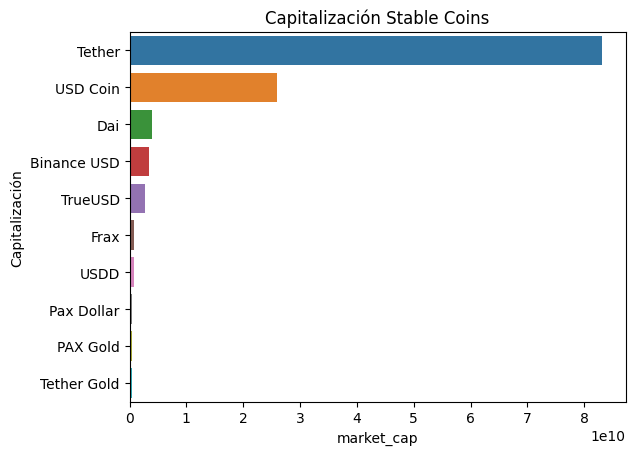

In [11]:
sns.barplot(x =  'market_cap', y = 'name', data = stable_df)
plt.title("Capitalización Stable Coins")
plt.ylabel("Capitalización")
plt.show()

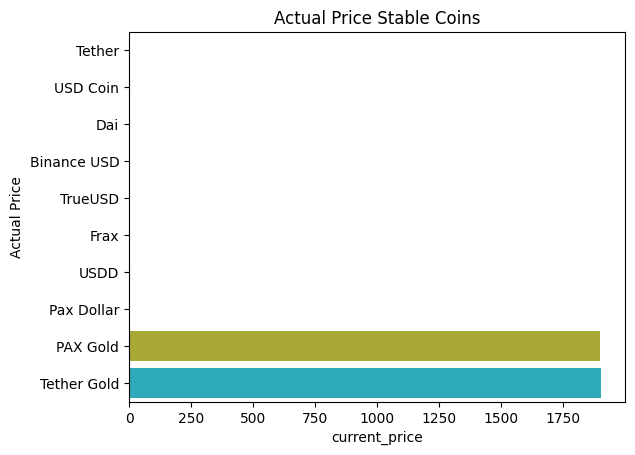

In [12]:
sns.barplot(x = 'current_price', y = 'name' , data = stable_df)
plt.title("Actual Price Stable Coins")
plt.ylabel("Actual Price")
plt.show()

Comparemos ahora la capitalización de nuestras Stable Coins elegidas con el resto.

Visualicemos la distribución de la capitalización de mercado de las stablecoins que no están en el top 10 mediante un gráfico de tortas. 

Cada segmento del gráfico representa una stablecoin, etiquetada con su nombre, y el porcentaje que representa en la capitalización de mercado total de las stablecoins restantes.

In [13]:
stable_resto = stable_market_cap_data[['name', 'market_cap']][~(stable_market_cap_data['name'].isin(stable_list))] 

stable_con_resto = stable_df[['name', 'market_cap']]

stable_con_resto.loc[len(stable_con_resto.index)] = ['Resto', stable_resto['market_cap'].sum()]

C:\Users\Pablo\AppData\Local\Temp\ipykernel_5236\610482935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stable_con_resto.loc[len(stable_con_resto.index)] = ['Resto', stable_resto['market_cap'].sum()]


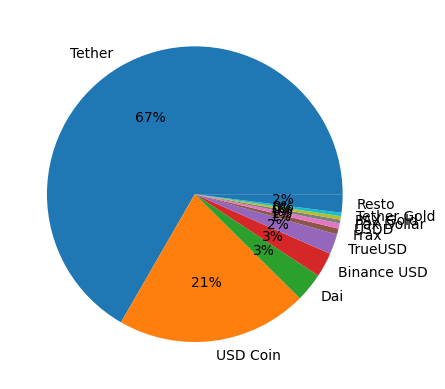

In [14]:
plt.pie(stable_con_resto.market_cap, labels=stable_con_resto.name, autopct='%.0f%%')

plt.show()

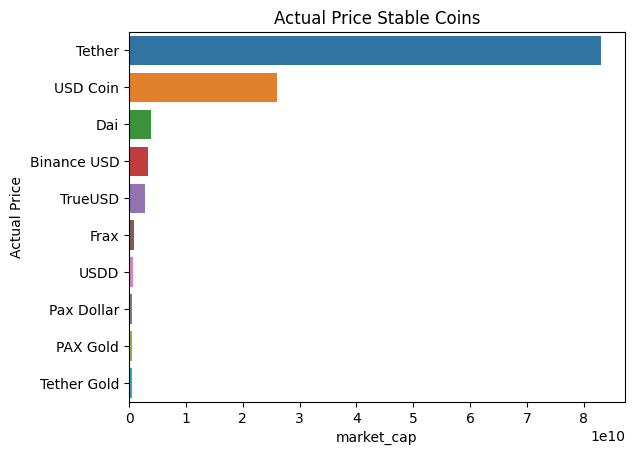

In [15]:
sns.barplot(x = 'market_cap', y = 'name' , data = stable_df)
plt.title("Actual Price Stable Coins")
plt.ylabel("Actual Price")
plt.show()

Busquemos más claridad en forma de lista:

In [16]:
total_market_cap = stable_con_resto['market_cap'].sum()

for index, row in stable_con_resto.iterrows():
    percentage = (row['market_cap'] / total_market_cap) * 100
    rounded_percentage = round(percentage, 2)
    print(f"{row['name']}: {rounded_percentage}%")

Tether: 66.68%
USD Coin: 20.89%
Dai: 3.15%
Binance USD: 2.68%
TrueUSD: 2.21%
Frax: 0.65%
USDD: 0.58%
Pax Dollar: 0.41%
PAX Gold: 0.38%
Tether Gold: 0.38%
Resto: 2.0%


Basándonos tanto en el gráfico como en el listado de porcentajes de capitalización de mercado para las stablecoins seleccionadas, podemos observar lo siguiente:

Tether (USDT) es la stablecoin líder con una capitalización de mercado del 68.12%. Esto indica que Tether es ampliamente adoptada y utilizada en el mercado de criptomonedas.

USD Coin (USDC) ocupa el segundo lugar con un 21.25% de la capitalización total. Al igual que Tether, USD Coin es una stablecoin respaldada por dólares estadounidenses, lo que la hace atractiva para su uso en el comercio de criptomonedas.

Dai (DAI) representa un 3.21% del mercado de stablecoins. Dai es una stablecoin descentralizada respaldada por garantías criptográficas y es parte del ecosistema MakerDAO.

Binance USD (BUSD) tiene una participación del 2.74%. Esta stablecoin es emitida por la plataforma de intercambio Binance y se utiliza como un puente entre las operaciones en Binance y otras plataformas.

TrueUSD (TUSD) tiene una participación del 2.25%. Similar a otras stablecoins, TrueUSD está respaldada por dólares estadounidenses en una relación de 1:1.

Frax (FRAX) representa el 0.66% del mercado. Frax es una stablecoin algorítmica que utiliza un protocolo descentralizado para mantener su estabilidad en valor.

USDD y Pax Dollar (USDP) tienen un 0.59% y 0.41% respectivamente. Aunque tienen una participación relativamente pequeña, siguen siendo relevantes en el panorama de las stablecoins.

PAX Gold (PAXG) y Tether Gold (XAUT) tienen una participación del 0.39% y 0.38% respectivamente. Estas stablecoins están respaldadas por oro y ofrecen una alternativa respaldada por activos físicos en el mundo de las criptomonedas.

En general, Tether (USDT) y USD Coin (USDC) dominan el mercado de stablecoins, seguidos por otras opciones populares y novedosas como Dai, Binance USD y TrueUSD. Estas stablecoins juegan un papel importante en la facilitación de transacciones en el mundo de las criptomonedas, brindando una alternativa a la volatilidad inherente de muchas criptomonedas tradicionales.